# Identifier desing

$u(t) = k \sin(\omega t + \theta)$

$x'(t) = ax(t) + w_1\sigma(x(t)) + w_2\sigma(x(t))u(t)$  

$X'(t) = aX(t) + W_1\sigma(X(t)) + W_2\sigma(X(t))u(t)$

$P^2 W_1^2 \Lambda_1 + 2 P A + \Lambda_1^{-1}L_{\sigma} + \Lambda_1^{-1}L_{\sigma}(u_0 + u_1 x^{+}) = 0 \ => P_1, P_2 \ => P = \ \{P_i | P_i > 0\}$

$\Delta = x(t) - X(t)$

$W_1' = -K_1^{-1} P \Delta \sigma(X(t))$

$W_2' = -K_2^{-1} P \Delta \sigma(X(t)) u(t)$


# Numerical solution 

$x' = f\\h=t_{i+1}-t_i\\ x_{i+1} = x_i + h*f(t_i, x_i)$



$X' = F\\ X_{i+1} = X_i + h*F(t_i, X_i)$

$W_1' = DW_1$

$W_{1,i+1} = W_i + h*DW_1(t_i)$

$W_2' = DW_2$

$W_{2,i+1} = W_{2,i} + h*DW_2(t_i)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, tan, cos, exp, sqrt

In [2]:
def sigma_1(x):
    return 1/(1+round(exp(-x), 5))

In [3]:
def u(t, k=1,w=1,o=0):
    return k*sin(w*t+o)

In [4]:
def f_1(t, x, u, a=1, w_1=0.2, w_2=0.1, k=1, w=1, o=0):
    return a*x + w_1*sigma_1(x) + w_2*sigma_1(x)*u(t, k, w, o)

In [5]:
def F_1(t, X, u, A=1, W_1=1, W_2=1, k=1, w=1, o=0):
    return A*X + W_1*sigma_1(X) + W_2*sigma_1(X)*u(t,k,w,o)

In [6]:
def DW_1_1(t, X, er, k_1=1, p=1):
    return round(-(1/k_1)*p*er*sigma_1(X), 5)

In [7]:
def DW_2_1(t, X, u, er, k_2=1, p=1, k=1, w=1, o=0):
    return round(-(1/k_2)*p*er*sigma_1(X)*u(t,k,w,o), 5)

In [8]:
def P(a, w_1, w_2, l_1, l_2, l_3, l_4, l_sig, u_0, u_1, x_plus):
    D = round((w_1*l_1*w_1 + w_2*l_2*w_2 + l_3 + l_4)**2 - 4*2*a*((1/l_1)*l_sig + (1/l_2)*l_sig*(u_0+u_1*x_plus)), 5)
    p_1 = round((-(w_1*l_1*w_1 + w_2*l_2*w_2 + l_3 + l_4) + sqrt(D))/(4*a), 5)
    p_2 = round((-(w_1*l_1*w_1 + w_2*l_2*w_2 + l_3 + l_4) - sqrt(D))/(4*a), 5)
    return (p_1>0)*p_1 + (p_2>0)*p_2

In [9]:
def identifier(f, F, u, DW_1, DW_2, T=1, n=50, x_0=1, a=1, A=1, k=1, w=1, o=0,
               w_1=1, w_2=1, l_1=1, l_2=1, l_3=1, l_4=1, l_sig=1, 
               u_0=1, u_1=1, x_plus=1, k_1=1, k_2=1):
    t = [0]
    x = [x_0]
    X = [x_0]
    h = round(T/n, 5)
    er = [x[0]-X[0]] 
    p = P(a, w_1, w_2, l_1, l_2, l_3, l_4, l_sig, u_0, u_1, x_plus)
    W_1 = [w_1+0.5]
    W_2 = [w_2+0.4]
    
    for i in range(n-1):
        t.append(t[i]+h)
        x.append(x[i] + h*f(t[i], x[i], u, a, w_1, w_2, k, w, o)) 
        X.append(X[i] + h*F(t[i], X[i], u, A, W_1[i], W_2[i], k, w, o))
        er.append(x[i]-X[i])
        W_1.append(W_1[i] + h*DW_1(t[i], X[i], er[i], k_1, p))
        W_2.append(W_2[i] + h*DW_2(t[i], X[i], u, er[i], k_2, p, k, w, o))
        
    return t, er, x, X, W_1, W_2

In [10]:
def printRes(res):
    fig, ax = plt.subplots(4)
    ax[0].plot(res[0], list(map(abs,res[1])), 'r', label='Error')
    #ax[0].plot(res[0], res[1], 'r', label='Error')
    ax[1].plot(res[0], res[2], 'g', label='x(t)')
    ax[2].plot(res[0], res[3], 'b', label='xx(t)')
    ax[3].plot(res[0], res[4], label='W_1')
    ax[3].plot(res[0], res[5], label='W_2')
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()
    ax[3].legend()

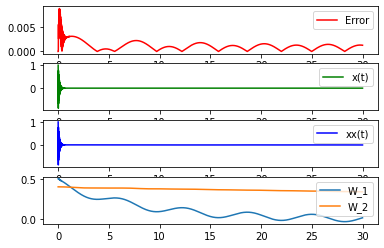

In [11]:
I = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=30, n=2000, x_0=1, a=-125, A=-125, k=1, w=1, o=0,
               w_1=0, w_2=0, l_1=0.8, l_2=0.001, l_3=0.001, l_4=0.001, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I)

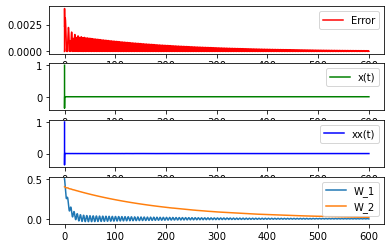

In [12]:
I = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=600, n=55000, x_0=1, a=-125, A=-125, k=1, w=1, o=0,
               w_1=0, w_2=0, l_1=0.8, l_2=0.001, l_3=0.001, l_4=0.001, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I)

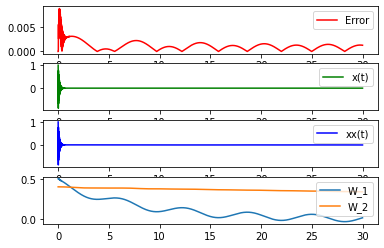

In [13]:
I_1 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=30, n=2000, x_0=1, a=-125, A=-125, k=1, w=1, o=0,
               w_1=0, w_2=0, l_1=0.8, l_2=0.001, l_3=0.001, l_4=0.001, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I_1)

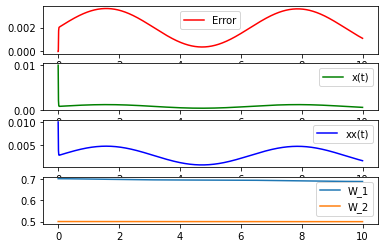

In [14]:
I_2 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=10, n=2000, x_0=0.01, a=-125, A=-125, k=1, w=1, o=0,
               w_1=0.2, w_2=0.1, l_1=0.88, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
               u_0=1, u_1=0.1, x_plus=1, k_1=-0.17, k_2=-2) 
printRes(I_2)

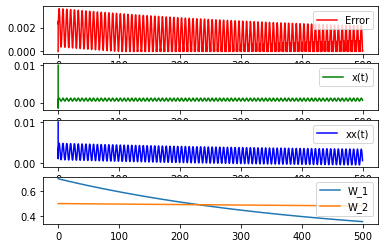

In [15]:
I_2 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=500, n=50000, x_0=0.01, a=-125, A=-125, k=1, w=1, o=0,
               w_1=0.2, w_2=0.1, l_1=0.88, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
               u_0=1, u_1=0.1, x_plus=1, k_1=-0.17, k_2=-2) 
printRes(I_2)

# The best identifier

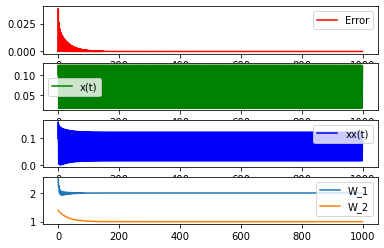

In [16]:
I_3 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=1000, n=50000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
               w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I_3)

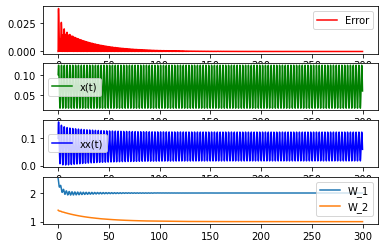

In [17]:
I_3 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=300, n=50000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
               w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I_3)

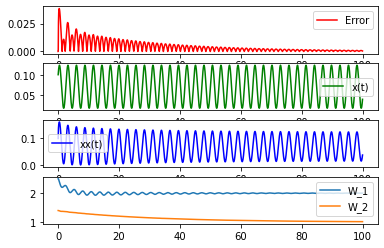

In [18]:
I_4 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=100, n=5000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
               w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
               u_0=3, u_1=3, x_plus=10, k_1=-0.17, k_2=-2)
printRes(I_4)

# Experiments with activation functions and form of identifier

$\large Experiment\ 1$

$x'(t) = a x(t) + w_1\sigma(x(t)) + w_2\sigma(x(t))u(t)$  

$X'(t) = A X(t) + W_1\sigma(X(t)) + W_2\sigma(X(t))u(t)$

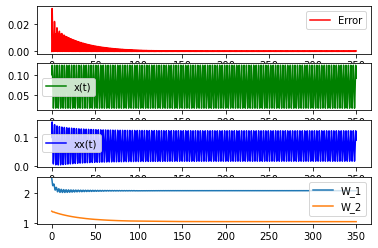

In [21]:
Ind = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=350, n=50000, x_0=0.1, a=-15, A=-15.7, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind)

WW_1 ->  2.058214607300075 
WW_2 ->  1.0287531015999236


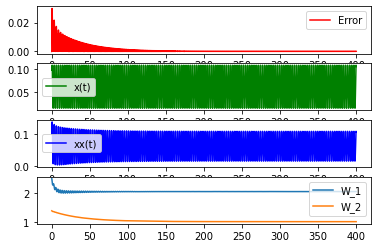

In [22]:
Ind_1 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-17, A=-17.5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_1)
print('WW_1 -> ', Ind_1[4][-1],'\nWW_2 -> ', Ind_1[5][-1])

WW_1 ->  2.117341009999926 
WW_2 ->  1.0576796300001812


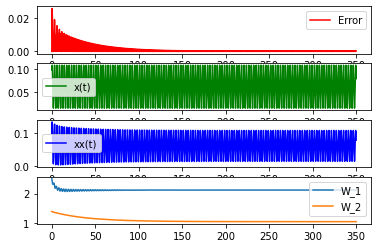

In [23]:
Ind_2 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=350, n=50000, x_0=0.1, a=-17, A=-18, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_2)
print('WW_1 -> ', Ind_2[4][-1],'\nWW_2 -> ', Ind_2[5][-1])

WW_1 ->  1.8836846506999911 
WW_2 ->  0.942535461400005


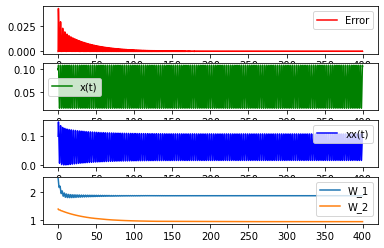

In [23]:
Ind_3 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-17, A=-16, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_3)
print('WW_1 -> ', Ind_3[4][-1],'\nWW_2 -> ', Ind_3[5][-1])

--

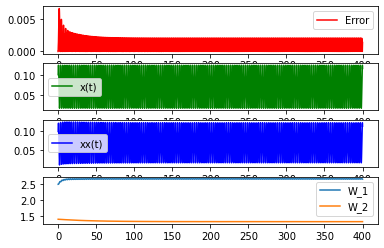

In [24]:
Ind_4 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=400, n=50000, x_0=0.1, a=-15, A=-20, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_4)

In [25]:
print('WW_1 -> ', Ind_4[4][-1],'\nWW_2 -> ', Ind_4[5][-1])

WW_1 ->  2.6605440799999367 
WW_2 ->  1.32472448000006


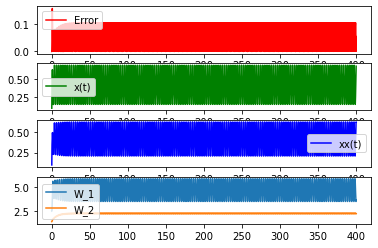

In [26]:
Ind_5 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-3, A=-7, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_5)

In [27]:
print('WW_1 -> ', Ind_5[4][-1],'\nWW_2 -> ', Ind_5[5][-1])

WW_1 ->  3.628510601800025 
WW_2 ->  2.2163339987999895


WW_1 ->  2.747242840500037 
WW_2 ->  -1.1001842643000017


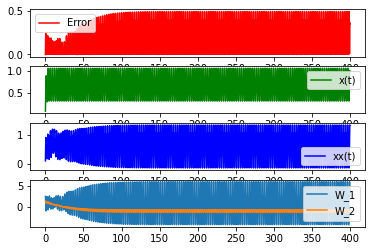

In [28]:
Ind_6 = identifier(f_1, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-2, A=-1, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ind_6)
print('WW_1 -> ', Ind_6[4][-1],'\nWW_2 -> ', Ind_6[5][-1])

$\large Conclusion$

$1)\ if \ a-A < \epsilon,$ 

$then\ W_1 -> w_1,\ W_2 -> w_2,$

$and\ \Delta -> 0$

$2)\ if |a-A| > \epsilon,$

$then\ W_1 \neq> w_1,\ W_2 \neq> w_2, $



$\large Experiment\ 2$

$\sigma(x) = \sin(x)\  [\cos(x)]$


$x'(t) = a x(t) + w_1\sigma(x(t)) + w_2\sigma(x(t))u(t)$  

$X'(t) = a X(t) + W_1\sigma(X(t)) + W_2\sigma(X(t))u(t)$ 

In [29]:
def sigma_2(x):
    return sin(x)

In [30]:
def f_2(t, x, u, a=1, w_1=0.2, w_2=0.1, k=1, w=1, o=0):
    return a*x + w_1*sigma_2(x) + w_2*sigma_2(x)*u(t, k, w, o)

In [31]:
def F_2(t, X, u, A=1, W_1=1, W_2=1, k=1, w=1, o=0):
    return A*X + W_1*sigma_2(X) + W_2*sigma_2(X)*u(t,k,w,o)

In [32]:
def DW_1_2(t, X, er, k_1=1, p=1):
    return round(-(1/k_1)*p*er*sigma_2(X), 5)

In [33]:
def DW_2_2(t,X, u, er,k_2=1, p=1, k=1, w=1, o=0):
    return round(-(1/k_2)*p*er*sigma_2(X)*u(t,k,w,o), 5)

WW_1 ->  2.4997052737000014 
WW_2 ->  1.3999685412


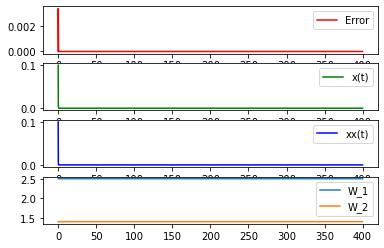

In [34]:
ind = identifier(f_2, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind)
print('WW_1 -> ', ind[4][-1],'\nWW_2 -> ', ind[5][-1])

WW_1 ->  2.4996541700000052 
WW_2 ->  1.399963600000003


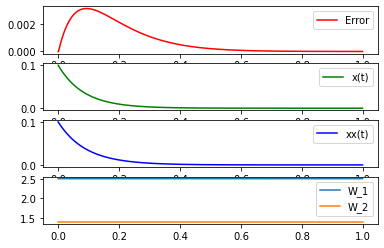

In [37]:
ind_3 = identifier(f_2, F_2, u, DW_1_2, DW_2_2, T=1, n=1000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_3)
print('WW_1 -> ', ind_3[4][-1],'\nWW_2 -> ', ind_3[5][-1])

WW_1 ->  2.4998702991000012 
WW_2 ->  1.3999864033999998


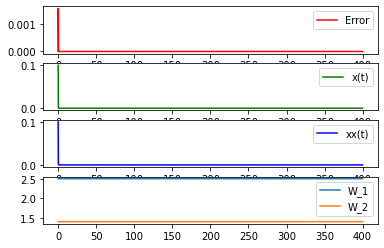

In [35]:
ind_1 = identifier(f_2, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15.5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_1)
print('WW_1 -> ', ind_1[4][-1],'\nWW_2 -> ', ind_1[5][-1])

WW_1 ->  0.44680236110003146 
WW_2 ->  0.7903803096999892


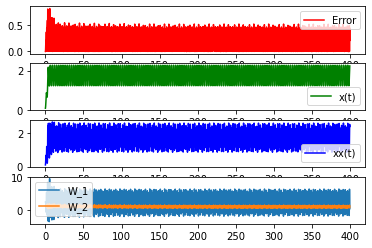

In [36]:
ind_2 = identifier(f_2, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-1, A=-1, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_2)
print('WW_1 -> ', ind_2[4][-1],'\nWW_2 -> ', ind_2[5][-1])

--

WW_1 ->  -758.4085161023006 
WW_2 ->  0.2116422303999939


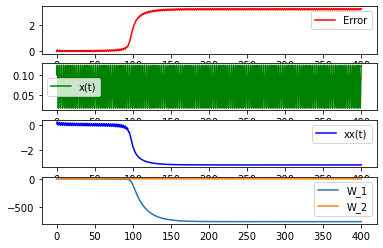

In [38]:
ind_4 = identifier(f_1, F_1, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-10, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_4)
print('WW_1 -> ', ind_4[4][-1],'\nWW_2 -> ', ind_4[5][-1])

$\large Conclusion$

$if\ \sigma(x) = \sin(x),\\then\ \Delta ->0, \\ but\ W_1 \neq> w_1,\ W_2 \neq> w_2$

--

$Let\ \sigma(x) = cos(x)$

In [39]:
def sigma_3(x):
    return cos(x)

In [40]:
def f_3(t, x, u, a=1, w_1=0.2, w_2=0.1, k=1, w=1, o=0):
    return a*x + w_1*sigma_3(x) + w_2*sigma_3(x)*u(t, k, w, o)

In [41]:
def F_3(t, X, u, A=1, W_1=1, W_2=1, k=1, w=1, o=0):
    return A*X + W_1*sigma_3(X) + W_2*sigma_3(X)*u(t,k,w,o)

In [42]:
def DW_1_3(t, X, er, k_1=1, p=1):
    return round(-(1/k_1)*p*er*sigma_3(X), 5)

In [43]:
def DW_2_3(t,X, u, er,k_2=1, p=1, k=1, w=1, o=0):
    return round(-(1/k_2)*p*er*sigma_3(X)*u(t,k,w,o), 5)

WW_1 ->  1.9999885008000762 
WW_2 ->  1.0000237524000157


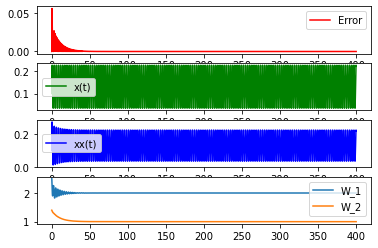

In [44]:
ind_5 = identifier(f_3, F_3, u, DW_1_3, DW_2_3, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_5)
print('WW_1 -> ', ind_5[4][-1],'\nWW_2 -> ', ind_5[5][-1])

WW_1 ->  2.038043384700029 
WW_2 ->  1.0205631496000838


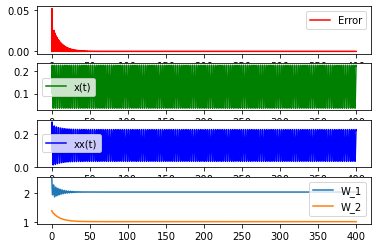

In [45]:
ind_6 = identifier(f_3, F_3, u, DW_1_3, DW_2_3, T=400, n=30000, x_0=0.1, a=-15, A=-15.3, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(ind_6)
print('WW_1 -> ', ind_6[4][-1],'\nWW_2 -> ', ind_6[5][-1])

$\large Conclusion$

$if\ \sigma(x) = cos(x)\\then\ \Delta -> 0\\ and\ W_1 -> w_1,\ W_2 -> w_2$

$\large Experiment\ 3$

$x'(t) = a x(t) + w_1\sigma(x(t)) + w_2\sigma(x(t))u(t)$ 

$X'(t) = a X(t) + W_1\Sigma(X(t)) + W_2\Sigma(X(t))u(t)$ 

WW_1 ->  2.5075686406999984 
WW_2 ->  1.4008451219999998


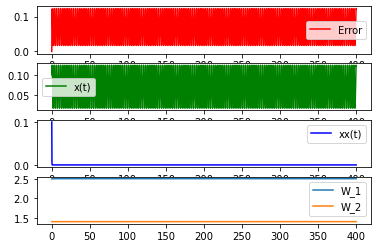

In [46]:
Ident = identifier(f_1, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident)
print('WW_1 -> ', Ident[4][-1],'\nWW_2 -> ', Ident[5][-1])

WW_1 ->  1.049249844899988 
WW_2 ->  0.5406350282999904


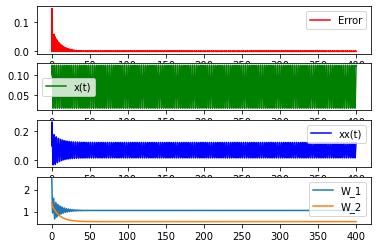

In [47]:
Ident_3 = identifier(f_1, F_3, u, DW_1_3, DW_2_3, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_3)
print('WW_1 -> ', Ident_3[4][-1],'\nWW_2 -> ', Ident_3[5][-1])

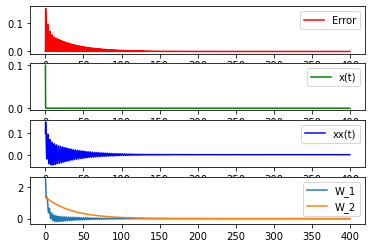

In [48]:
Ident_1 = identifier(f_2, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_1)

WW_1 ->  -1.2707200000927485e-05 
WW_2 ->  2.314840000071334e-05


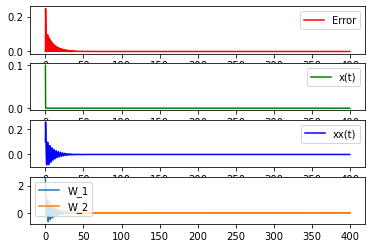

In [49]:
Ident_4 = identifier(f_2, F_3, u, DW_1_3, DW_2_3, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_4)
print('WW_1 -> ', Ident_4[4][-1],'\nWW_2 -> ', Ident_4[5][-1])

WW_1 ->  3.6491586191000307 
WW_2 ->  1.7153747290000152


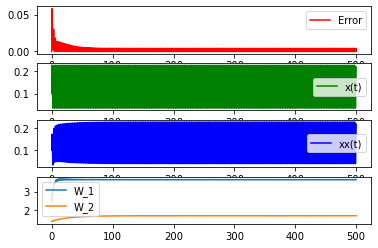

In [51]:
Ident_10 = identifier(f_3, F_1, u, DW_1_1, DW_2_1, T=500, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_10)
print('WW_1 -> ', Ident_10[4][-1],'\nWW_2 -> ', Ident_10[5][-1])

WW_1 ->  2.5141711670000007 
WW_2 ->  1.4015796492000003


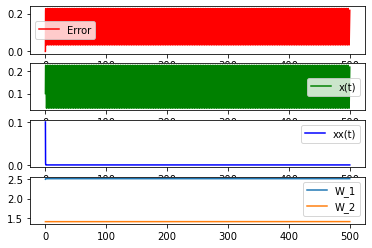

In [52]:
Ident_5 = identifier(f_3, F_2, u, DW_1_2, DW_2_2, T=500, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_5)
print('WW_1 -> ', Ident_5[4][-1],'\nWW_2 -> ', Ident_5[5][-1])

In [11]:
Ident_6 = identifier(f_2, F_1, u, DW_1_1, DW_2_1, T=400, n=30000, x_0=0.1, a=-15, A=-5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_6)
print('WW_1 -> ', Ident_6[4][-1],'\nWW_2 -> ', Ident_6[5][-1])

NameError: name 'f_2' is not defined

WW_1 ->  2.5071023572999986 
WW_2 ->  1.4007888694000004


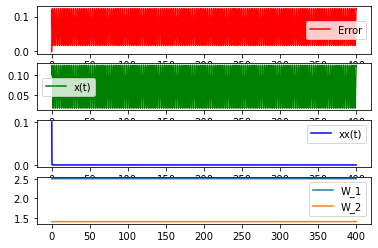

In [54]:
Ident_7 = identifier(f_1, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15.5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_7)
print('WW_1 -> ', Ident_7[4][-1],'\nWW_2 -> ', Ident_7[5][-1])

WW_1 ->  -1.2573900000064136e-05 
WW_2 ->  2.3814899999091894e-05


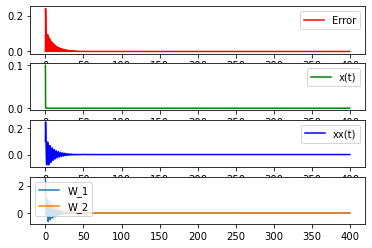

In [55]:
Ident_8 = identifier(f_2, F_3, u, DW_1_3, DW_2_3, T=400, n=30000, x_0=0.1, a=-15, A=-15.5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_8)
print('WW_1 -> ', Ident_8[4][-1],'\nWW_2 -> ', Ident_8[5][-1])

WW_1 ->  2.514098741099999 
WW_2 ->  1.4015613429


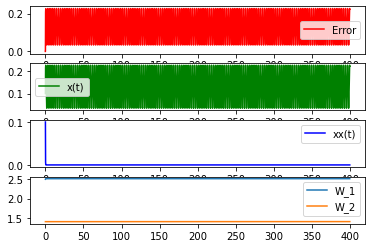

In [56]:
Ident_9 = identifier(f_3, F_2, u, DW_1_2, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15.5, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident_9)
print('WW_1 -> ', Ident_9[4][-1],'\nWW_2 -> ', Ident_9[5][-1])

WW_1 ->  15.525254072200028 
WW_2 ->  1.438054617299969


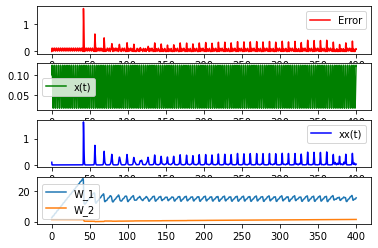

In [57]:
"""
Ident = identifier(f_1, F_2, u, DW_1_1, DW_2_2, T=400, n=30000, x_0=0.1, a=-15, A=-15, k=1.5, w=2.25, o=pi/4,
                   w_1=2, w_2=1, l_1=0.8, l_2=0.1, l_3=0.1, l_4=0.1, l_sig=0.8,
                   u_0=3, u_1=3, x_plus=10, k_1= -0.17, k_2= -2)
printRes(Ident)
print('WW_1 -> ', Ident[4][-1],'\nWW_2 -> ', Ident[5][-1])
"""

$\large Conclusion$

if we use $\sin(x)$ as activation function in real sistem aproximation and $sigmoidal$ function in identifier, then $\Delta -> 0, but W_1 \neq> w_1, W_2 \neq> w_2$

if x ~ sigmoid, X ~ cos, then $\Delta->0$

if x ~ sin, X ~ cos, then $\Delta->0$

if x ~ sin, X ~ sigmoid, then $\Delta->0$

if x ~ sin, X ~ cos and $a \neq A\ then \Delta->0$

